Projeto 1 -  Regressão Linear 
-------------------------------------------

Disciplina EEC1509 - APRENDIZAGEM DE MÁQUINA - 2018.2 
Aluno: Daniel Rodrigues de Luna - 20181023569

Tema Escolhido:
------------------------

Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

Source: https://www.kaggle.com/smid80/weatherww2/data


# Info sobre o datasheet

STA - Weather Station
Date - Self-explanatory
Precip - Precipitation in mm
WindGustSpd - Peak wind gust speed in km/h
MaxTemp - Maximum temperature in degrees Celsius
MinTemp - Minimum temperature in degrees Celsius
MeanTemp - Mean temperature in degrees Celsius
Snowfall - Snowfall and Ice Pellets in mm
PoorWeather - A repeat of the TSHDSBRSGF column
YR - Year of Observation
MO - Month of Observation
DA - Day of Observation
PRCP - Precipitation in Inches and Hundredths
DR - Peak wind gust direction in tens of degrees
SPD - Peak wind gust speed in knots
MAX - Maximum temperature in degrees Fahrenheit
MIN - Minimum temperature in degrees Fahrenheit
MEA - Mean temperature in degrees Fahrenheit
SNF - Snowfall in inches and tenths
SND - Snow depth (includes ice pellets) recorded at 1200 GMT except 0000 GMT in Far East Asian Area in inches and tenths
FT - Frozen Ground Top (depth in inches)
FB - Frozen Ground Base (depth in inches)
FTI - Frozen Ground Thickness (thickness in inches)
ITH - Ice Thickness on Water (inches and tenths)
PGT - Peak wind gust time (hours and tenths)
TSHDSBRSGF - Day with: Thunder; Sleet; Hail; Dust or Sand; Smoke or Haze; Blowing Snow; Rain; Snow; Glaze; Fog; 0 = No, 1 = Yes
SD3 - Snow depth at 0030 GMT includes ice pellets in inches and tenths
RHX - 24-hour maximum relative humidity, as a whole percent
RHN - 24-hour minimum relative humidity, as a whole percent
RVG - River guage in feet and tenths
WTE - Water equivalent of snow and ice on ground in inches and hundredths

In [0]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Há dois arquivos ".csv", verificar e associar a alguma variável

train_weather_locations=pd.read_csv('Weather Station Locations.csv')
train_summary_weather=pd.read_csv('Summary of Weather.csv')

/home/daniel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#Verificar o .head() . Esse datasheet não é muito importante para o problema visto que nele há informações apenas sobre as localizações e não sobre o clima em si.
train_weather_locations.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [0]:
#Verificar o .head()
train_summary_weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


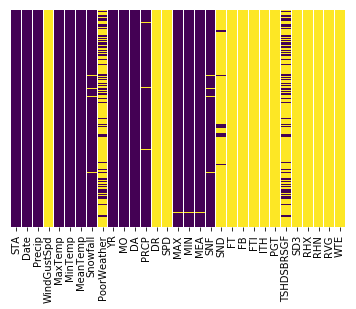

In [0]:
#Com esse heatmap, pode-se ver em amarelo a quantidade de dados faltantes
sns.heatmap(train_summary_weather.isnull(),yticklabels = False,cbar= False, cmap='viridis')

In [0]:
#Alguns métodos para descobrir mais informações sobre o dataset
train_summary_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

A partir do resultado acima, pode-se verificar que as colunas FT, FB, FTI, ITH, SD3, RHX, RHN, RVG, WTE contém todos os valores nulos. Portanto podem ser retirados já que provavelmente vão atrapalhar o desempenho final da máquina.

Há outras colunas que podem atrapalhar o desempenho? A partir do heatmap, vamos mostrar as colunas que possuem dados nulos

In [0]:
print(train_summary_weather.isnull().sum())

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64


Perceba que apenas as colunas STA, Date, Precip, MaxTemp, Mintemp, YR, MO, DA não possuem campos nulos. As colunas WindGustSpd, PoorWeather, DR, SPD, SND, PGT, TSHDSBRSGF possuem alguns campos completos, porém em sua maioria não há dados. De modo que as colunas 100% nulas e mais essas serão retiradas da análise.


In [0]:
#Algumas conclusões dos plots anteriores: 
#1) Analisando o datasheet, é possível verificar que as colunas FT, FB, FTI, ITH, SD3, RHX, RHN, RVG, WTE não possuem qualquer valor.
#2) Faz sentido então dropar as colunas "FT, FB, FTI, ITH, SD3, RHX, RHN, RVG, WTE".
#3) As colunas WindGustSpd, DR, SPD e PGT possuem a maior parte de seus valores como NaN, com apenas alguns sendo de fato dados provenientes apenas de 3 STAs diferentes (20602,31302,31401) 
#4) E com base no heatmap, há colunas com muito mais valores nulos do que informações, essas colunas serão retiradas 
#e inseridas caso sejam necessárias uma análise mais precisa dos dados, são elas:
# WindGustSpd, PoorWeather, DR, SPD, SND, PGT, TSHDSBRSGF
train_summary_weather_dropped = train_summary_weather.copy()
train_summary_weather_dropped.drop(['WindGustSpd', 'PoorWeather', 'DR', 'SPD', 'SND', 'PGT', 'TSHDSBRSGF', 'FT', 'FB', 'FTI', 'ITH', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],axis=1,inplace = True) 

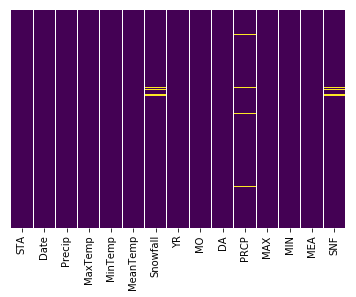

In [0]:
#Novo heatmap
sns.heatmap(train_summary_weather_dropped.isnull(),yticklabels = False,cbar= False, cmap='viridis')

In [0]:
#Verificando o HEAD
train_summary_weather_dropped.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0


In [0]:
#Verificando o describe
train_summary_weather_dropped.describe()

,STA,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,118566.000000,118572.000000,118542.000000
mean,29659.435795,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,81.003745,64.273808,72.644843
std,20953.209402,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,14.869361,14.481498,14.211082
min,10001.000000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,-28.000000,-37.000000,-32.000000
25%,11801.000000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,78.000000,59.000000,69.000000
50%,22508.000000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,85.000000,70.000000,78.000000
75%,33501.000000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,89.000000,74.000000,81.000000
max,82506.000000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,122.000000,94.000000,104.000000


# Cleaning the data

Pelo heatmap anterior, é possível perceber que os campos Snowfall, PRCP e SNF possuem valores nulos. Vamos verificar um a um.

Valores nulos de Snowfall: 1163
Quantidade total de linhas: 119040


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


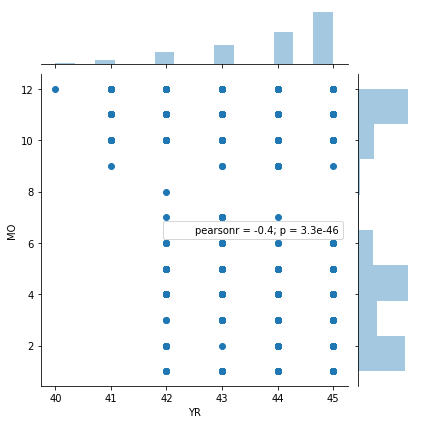

In [0]:
#Analisando os NaN de "Snowfall"
#train_summary_weather_dropped[train_summary_weather_dropped['Snowfall']==10001]
print('Valores nulos de Snowfall: ' + str(len(train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall])))
print('Quantidade total de linhas: ' + str(len(train_summary_weather_dropped.Snowfall)))
#train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]['YR'])
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]['MO'],kind='scatter')

Valores nulos de PRCP: 1932
Quantidade total de linhas: 119040


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


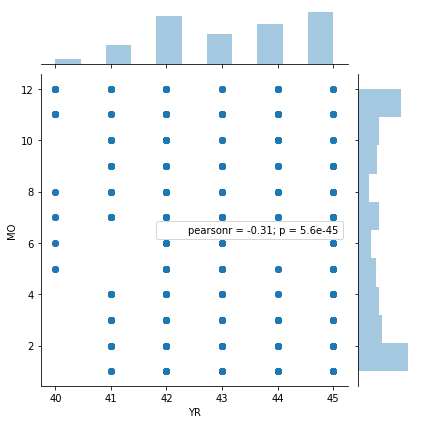

In [0]:
#Analisando os NaN de "PRCP"
#train_summary_weather_dropped[train_summary_weather_dropped['Snowfall']==10001]
print('Valores nulos de PRCP: ' + str(len(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP])))
print('Quantidade total de linhas: '+ str(len(train_summary_weather_dropped.PRCP)))
#train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['YR'])
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['MO'])
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['MO'],kind='scatter')
   

Valores nulos de SNF: 1163
Quantidade total de linhas: 119040


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


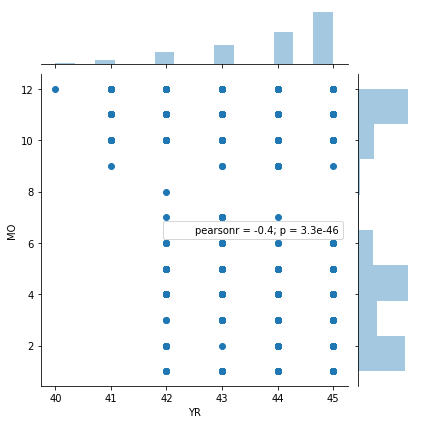

In [0]:
#Analisando os NaN de "SNF"
#train_summary_weather_dropped[train_summary_weather_dropped['Snowfall']==10001]
print('Valores nulos de SNF: ' + str(len(train_summary_weather_dropped[train_summary_weather_dropped.isnull().SNF])))
print('Quantidade total de linhas: ' + str(len(train_summary_weather_dropped.SNF)))
#train_summary_weather_dropped[train_summary_weather_dropped.isnull().Snowfall]
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['YR'])
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().PRCP]['MO'])
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().SNF]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().SNF]['MO'],kind='scatter')


Esses jointplots mostram que os dados faltantes das colunas SnowFall, PRCP, SNF estão relacioandos principalmente com o ano e o mês (as marcações em azul são os dados faltantes). Veja que entre 1940 e 1945 houve um aumento na quantidade de faltantes, principalmente entre os primeiros meses do ano e os meses finais.   

In [0]:
#Conlusões sobre a análise dos dados nulos nos campos SnowFall, PRCP, SNF: 
#1) Todos os dados NaN são referentes aos anos entre 1940 e 1945
#2) Estratégia de completar os "missing" values: Média dos meses de outros anos.

def impute_snowfall(cols):
    snowfall = cols[0]
    mo = cols[1]
    if pd.isnull(snowfall):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['Snowfall'].notna().mean()
    else:
        return snowfall
    
def impute_PRCP(cols):
    prcp = cols[0]
    mo = cols[1]
    if pd.isnull(prcp):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['PRCP'].notna().mean()
    else:
        return prcp
    
def impute_SNF(cols):
    snf = cols[0]
    mo = cols[1]
    if pd.isnull(snf):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['SNF'].notna().mean()
    else:
        return snf
    
        
train_summary_weather_dropped['Snowfall'] = train_summary_weather_dropped[['Snowfall','MO']].apply(impute_snowfall,axis=1)
train_summary_weather_dropped['PRCP'] = train_summary_weather_dropped[['PRCP','MO']].apply(impute_snowfall,axis=1)
train_summary_weather_dropped['SNF'] = train_summary_weather_dropped[['SNF','MO']].apply(impute_snowfall,axis=1)


#snowfall_per_month=[0]*13
#for i in range(0,13):
#    snowfall_per_month[i]=train_summary_weather_dropped[train_summary_weather_dropped['MO'] == i+1]['Snowfall'].notna().mean()
#print(snowfall_per_month)


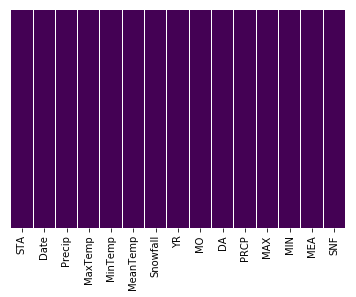

In [0]:
#Plotando novamente o heatmap
sns.heatmap(train_summary_weather_dropped.isnull(),yticklabels = False,cbar= False, cmap='viridis')

In [0]:
#Análise dos dados do heatmap foi feita, agora verificar se há ainda valores NaN
print(train_summary_weather_dropped.isnull().sum())
#sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().MAX]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().MAX]['MO'],kind='scatter')


STA           0
Date          0
Precip        0
MaxTemp       0
MinTemp       0
MeanTemp      0
Snowfall      0
YR            0
MO            0
DA            0
PRCP          0
MAX         474
MIN         468
MEA         498
SNF           0
dtype: int64


Há ainda valores nulos, apesar de não visíveis no heatmap, próximo passo é tratar esses valores. Veja que as colunas MAX, MIN, MEA referentes aos valores em Farenheit dos campos Maxtemp, MinTemp, MeanTemp, respectivamente. Há 3 possíveis formas de resolver esse problema:
1) De modo semelhante as colunas Snowfall, PRCP, SNF: usar a média mensal dos valores informados e completar os campos vazios com essas informações.
2) Dropar essas colunas, uma vez que os dados em Celsius foram informados.
3) Transformar os valores em Celsius para Farenheit das colunas faltantes.

Para esse problema, escolhi utilizar a opção 1. Vamos plotar os jointplot para cada um desses campos:


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


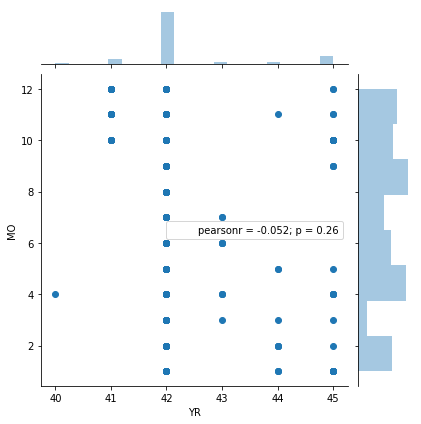

In [0]:
#Jointplot da coluna MAX 
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().MAX]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().MAX]['MO'],kind='scatter')


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


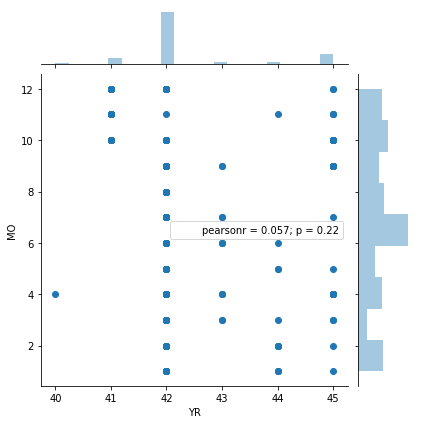

In [0]:
#Jointplot da coluna MIN
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().MIN]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().MIN]['MO'],kind='scatter')


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


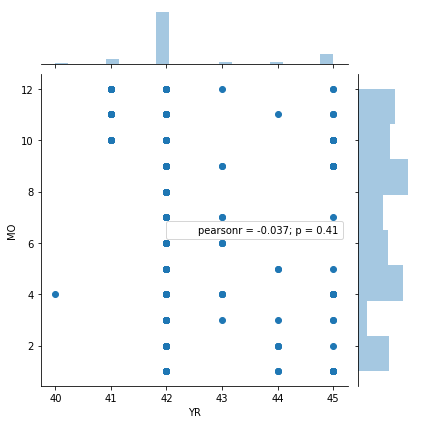

In [0]:
#Jointplot da coluna MEA
sns.jointplot(train_summary_weather_dropped[train_summary_weather_dropped.isnull().MEA]['YR'],train_summary_weather_dropped[train_summary_weather_dropped.isnull().MEA]['MO'],kind='scatter')


Algumas conclusões: a maior parte dos dados faltantes foram concentrados no ano de 1942 e englobou praticamente todos os meses do ano.

In [0]:
#Conlusões sobre a análise dos dados nulos nos campos MAX, MIN, MEA: 
#1) Todos os dados NaN são referentes aos anos entre 1940 e 1945.
#2) Estratégia de completar os "missing" values: Média dos meses de outros anos.

def impute_max(cols):
    impute_max_values = cols[0]
    mo = cols[1]
    if pd.isnull(impute_max_values):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['MAX'].notna().mean()
    else:
        return impute_max_values

def impute_min(cols):
    impute_min_values = cols[0]
    mo = cols[1]
    if pd.isnull(impute_min_values):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['MIN'].notna().mean()
    else:
        return impute_min_values

def impute_mea(cols):
    impute_mea_values = cols[0]
    mo = cols[1]
    if pd.isnull(impute_mea_values):
        return train_summary_weather_dropped[train_summary_weather_dropped['MO'] == mo]['MEA'].notna().mean()
    else:
        return impute_mea_values
    

train_summary_weather_dropped['MAX'] = train_summary_weather_dropped[['MAX','MO']].apply(impute_max,axis=1)
train_summary_weather_dropped['MIN'] = train_summary_weather_dropped[['MIN','MO']].apply(impute_min,axis=1)
train_summary_weather_dropped['MEA'] = train_summary_weather_dropped[['MEA','MO']].apply(impute_mea,axis=1)


STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
PRCP        0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64


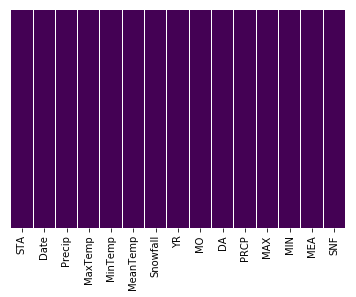

In [0]:
#Verificar se há ainda valores NaN
print(train_summary_weather_dropped.isnull().sum())
sns.heatmap(train_summary_weather_dropped.isnull(),yticklabels = False,cbar= False, cmap='viridis')


Não há mais valores nulos, nem valores faltantes. Embora pareça que o tratamento de dados acabou, verificando o datasheet há alguns campos numéricos que há strings. Isso pode ser um problema para fazermos as análises.

Para esses casos será atribuído o valor 0 e para os casos em que o valor da string é um número, apenas uma conversão de str para float será feito. 

In [0]:
#train_summary_weather_dropped[train_summary_weather_dropped['Precip']=='T']
#sns.countplot(train_summary_weather_dropped[train_summary_weather_dropped['Precip']=='T']['MeanTemp'])
#Há uma string de valor 'T' em colunas númericas numericos e sem significado aparente, nesse caso em específico,
# o valor 'T' estava presente na coluna Precip. Além disso as colunas 'Precip' e 'PRCP' são todas str, necessário então
# uma conversão para float.

def impute_nonstr(cols):
    impute_mea_values = cols
    if impute_mea_values == 'T':
        return 0
    elif impute_mea_values == '#VALUE!':
        return 0
    elif type(impute_mea_values) == str:
        return float(impute_mea_values)
    else:
        return impute_mea_values

train_summary_weather_dropped_teste = train_summary_weather_dropped.copy()    
train_summary_weather_dropped_teste['Precip'] = train_summary_weather_dropped_teste['Precip'].apply(impute_nonstr)
train_summary_weather_dropped_teste['PRCP'] = train_summary_weather_dropped_teste['PRCP'].apply(impute_nonstr)
train_summary_weather_dropped_teste['MaxTemp'] = train_summary_weather_dropped_teste['MaxTemp'].apply(impute_nonstr)
train_summary_weather_dropped_teste['MinTemp'] = train_summary_weather_dropped_teste['MinTemp'].apply(impute_nonstr)
train_summary_weather_dropped_teste['MeanTemp'] = train_summary_weather_dropped_teste['MeanTemp'].apply(impute_nonstr)
train_summary_weather_dropped_teste['Snowfall'] = train_summary_weather_dropped_teste['Snowfall'].apply(impute_nonstr)
train_summary_weather_dropped_teste['YR'] = train_summary_weather_dropped_teste['YR'].apply(impute_nonstr)
train_summary_weather_dropped_teste['MO'] = train_summary_weather_dropped_teste['MO'].apply(impute_nonstr)
train_summary_weather_dropped_teste['DA'] = train_summary_weather_dropped_teste['DA'].apply(impute_nonstr)

#train_summary_weather_dropped_teste[train_summary_weather_dropped_teste['Snowfall'] == '#VALUE!']

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0.0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0.000,28.888889,21.666667,25.555556,0.0,42,7,2,0.00,84.0,71.0,78.0,0
2,10001,1942-7-3,2.540,26.111111,22.222222,24.444444,0.0,42,7,3,0.10,79.0,72.0,76.0,0
3,10001,1942-7-4,2.540,26.666667,22.222222,24.444444,0.0,42,7,4,0.10,80.0,72.0,76.0,0
4,10001,1942-7-5,0.000,26.666667,21.666667,24.444444,0.0,42,7,5,0.00,80.0,71.0,76.0,0


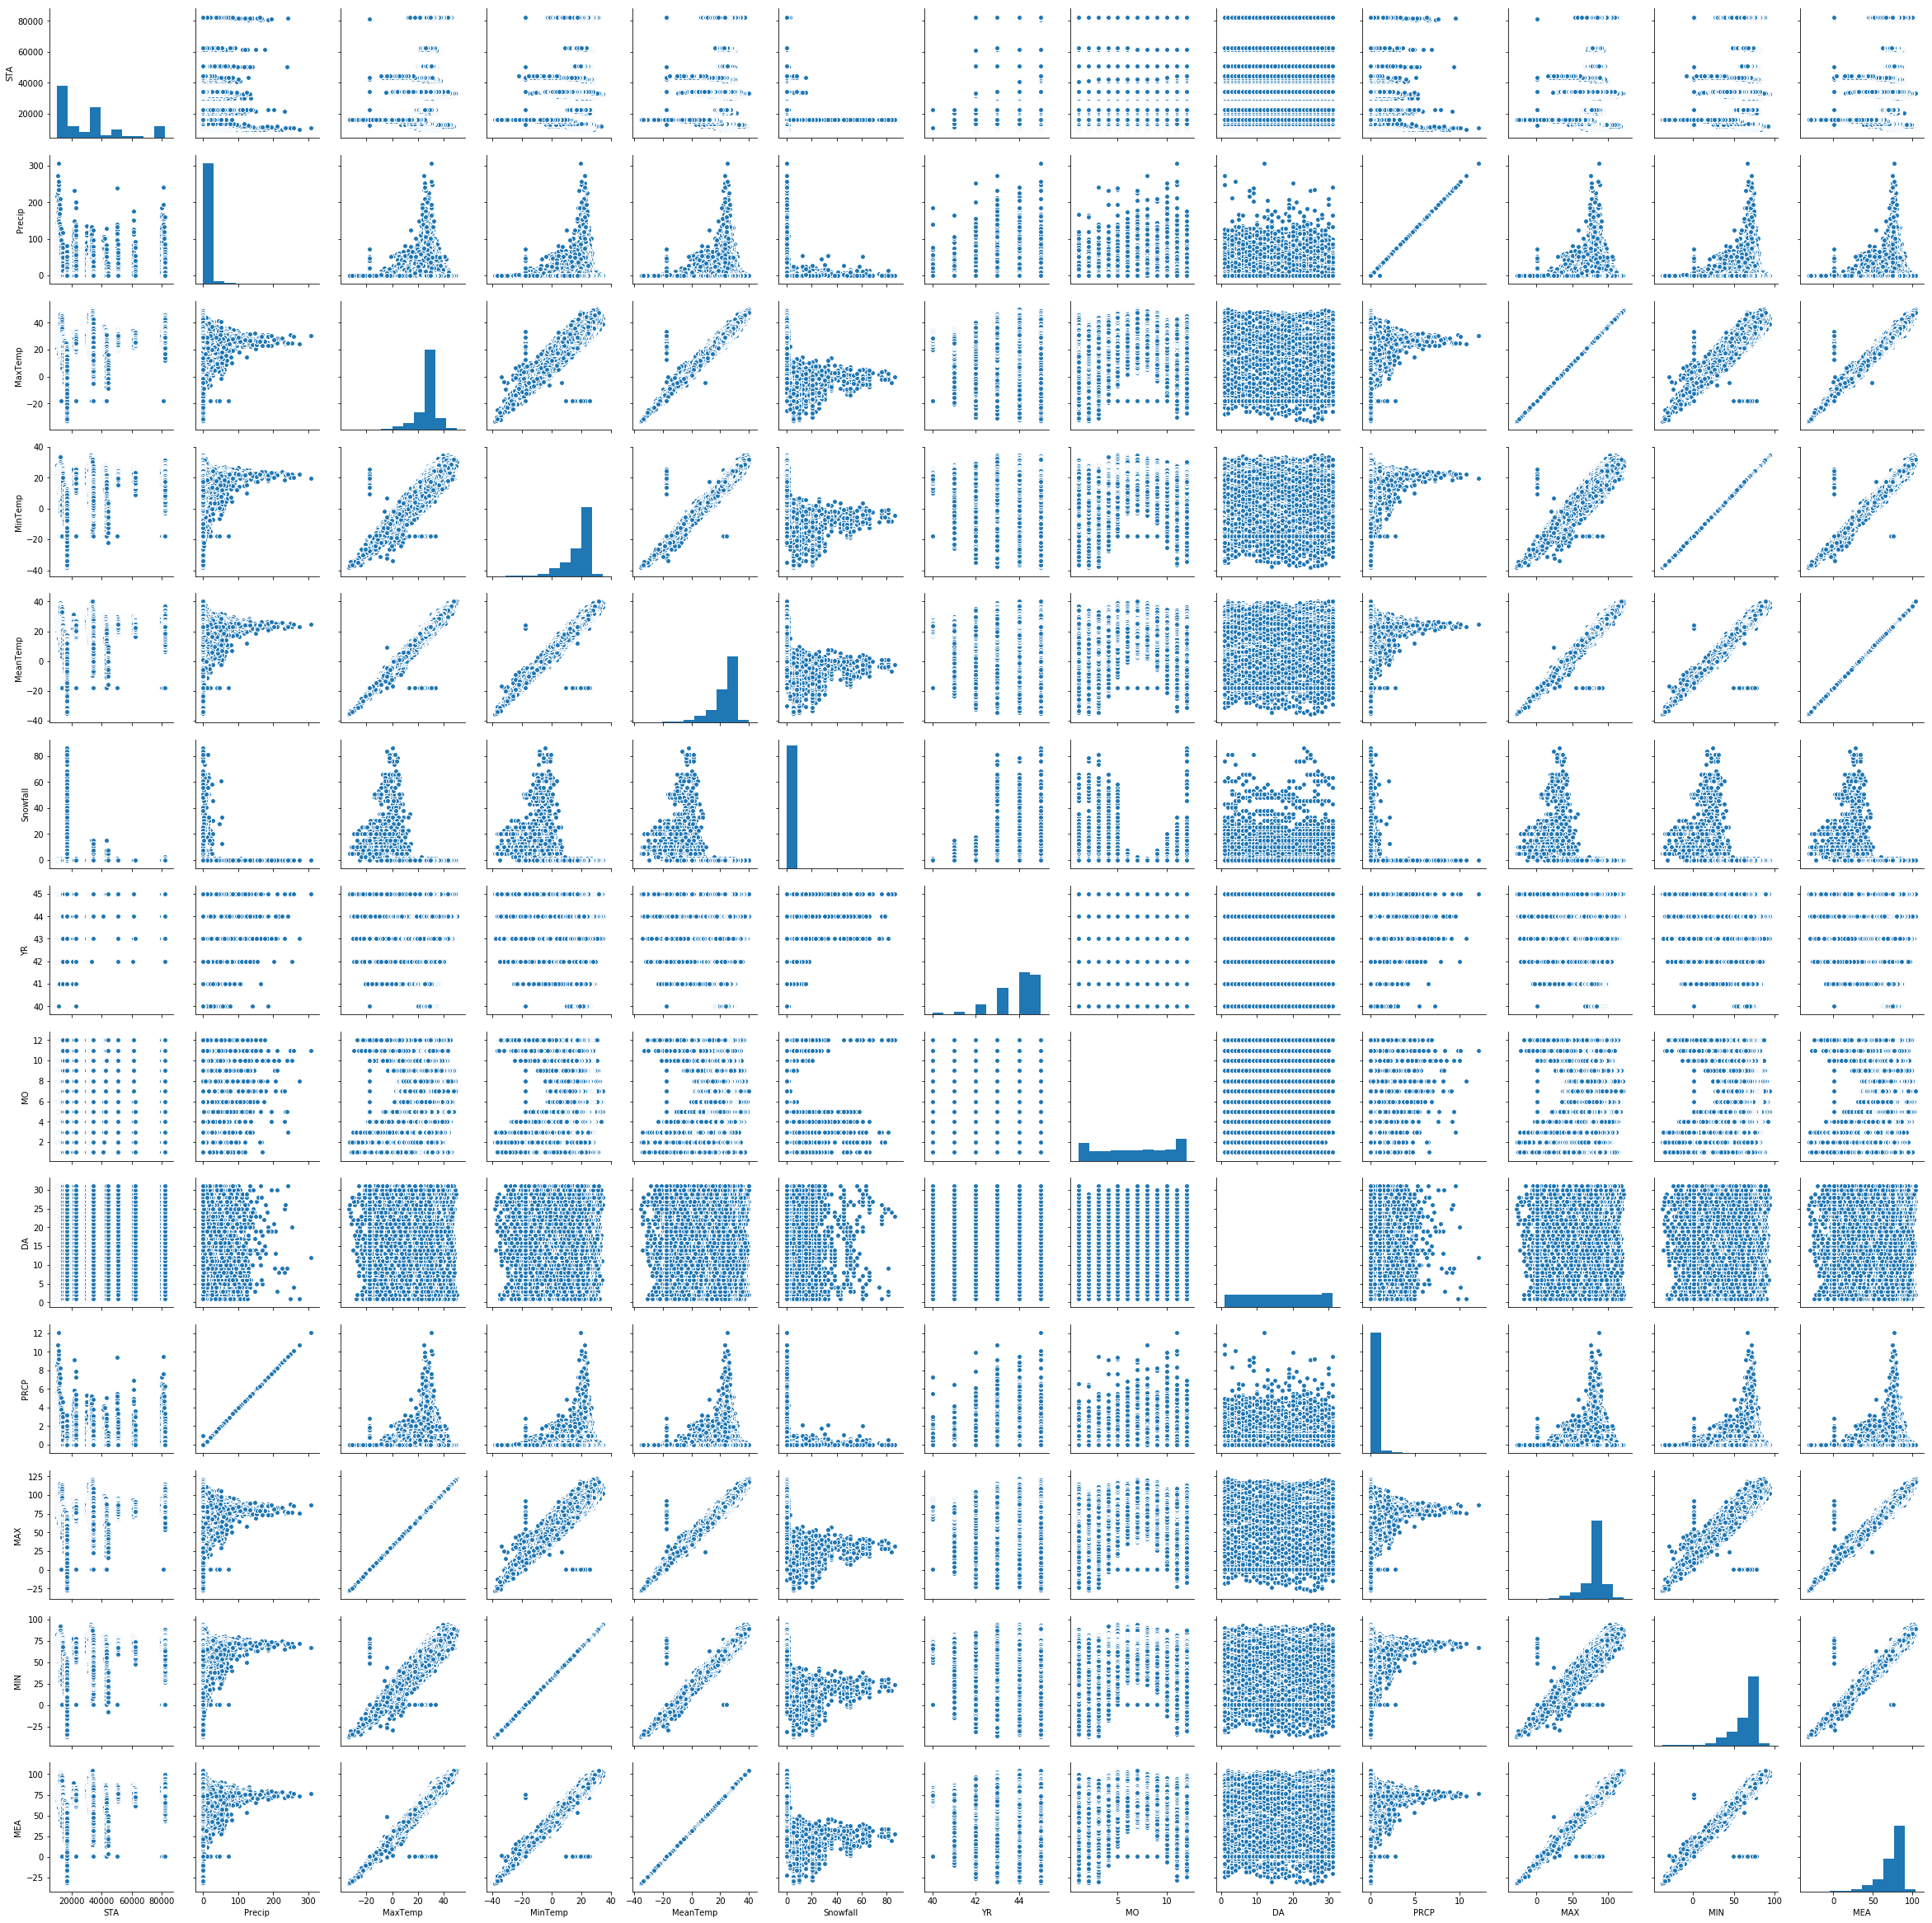

In [0]:
#O pairplot é útil para saber quais colunas e dados possuem uma relação linear #clicar 2 vezes em cima do gráfico para ver melhor
sns.pairplot(train_summary_weather_dropped_teste)

TRAINING AND TEST DATA

In [0]:
#verificando os index
train_summary_weather_dropped_teste.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'MeanTemp', 'Snowfall',
       'YR', 'MO', 'DA', 'PRCP', 'MAX', 'MIN', 'MEA', 'SNF'],
      dtype='object')

In [0]:
#Setando X como sendo os parâmetros que vamos analisar em relação com a temperatura máxima (Y)

X = train_summary_weather_dropped_teste[['Precip', 'MinTemp', 'MeanTemp', 'Snowfall','YR', 'MO', 'DA']]
Y = train_summary_weather_dropped_teste['MaxTemp']

In [0]:
#importando o scickitlearn e separando training sets e os testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

TRAINING MODEL

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [0]:
#sns.heatmap(x_train.isna(),yticklabels = False,cbar= False, cmap='viridis')
#y_train.head()
lm.fit(x_train,y_train)
#type(train_summary_weather_dropped_teste['DA'][1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
lm.coef_

array([-3.74726090e-03, -8.90595571e-01,  1.88129628e+00, -1.59963063e-02,
        2.15708390e-02, -8.63658914e-04,  3.79632331e-04])

Predicting Test Data

In [0]:
predicted_x=lm.predict(x_test)

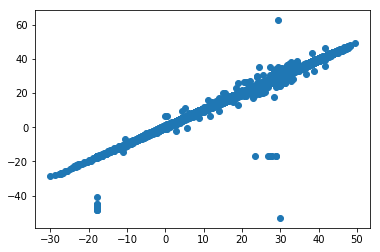

In [0]:
plt.scatter(y_test,predicted_x)

Evaluating Model

In [0]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(predicted_x,y_test))
print('MSE: ', metrics.mean_squared_error(predicted_x,y_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(predicted_x,y_test)))

MAE:  0.39008778768453933
MSE:  1.1356470246103887
RMSE:  1.0656674080642556


/home/daniel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


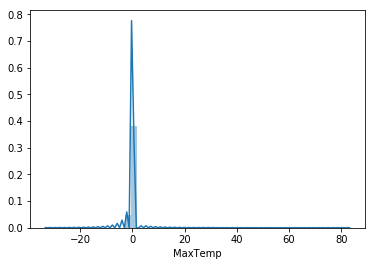

In [0]:
sns.distplot(y_test-predicted_x,bins=50)

In [0]:
#Conclusion
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
#customers.columns
#columns['Coefficient']
coeff_df

,Coeff
Precip,-0.003747
MinTemp,-0.890596
MeanTemp,1.881296
Snowfall,-0.015996
YR,0.021571
MO,-0.000864
DA,0.000380


# Conclusão

Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?


De acordo com os resultados apresentados, há uma relação muito maior entre a temperatura máxima e a temperatura média do que com a temperatura mínima. Além disso, com os coefficientes encontrados é possível obter uma previsão da temperatura mínima com base na tempertatura máxima.